In [1]:
#Combining the images and their corresponding list number whether they are in or out of the Blue light region

In [2]:
from torch.utils.data import DataLoader


#save Ram from exploding
#Begone memory
def memory():
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
    Begone_memory()
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
memory()
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

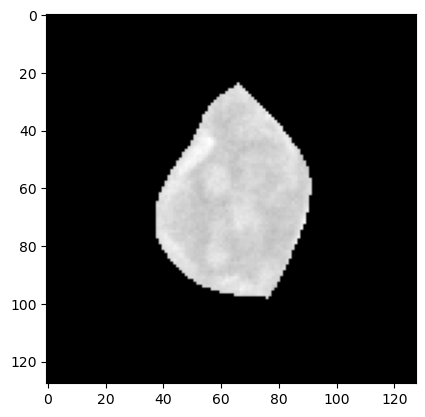

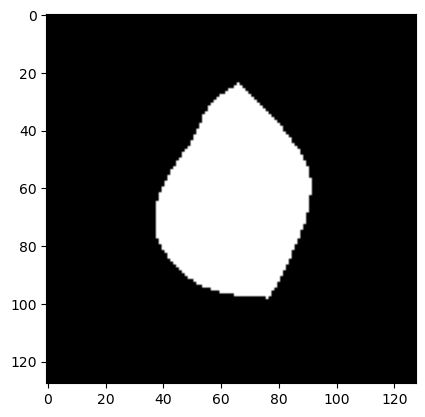

In [3]:
#make sure the list and cell images align correctly
#for 2nd:

ameoba_image_2nd = np.load(r"A:\3rd_Year_Project\Project_code\data\final_data\2nd_light.npy")
BlueLight_image_2nd = np.load(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\2nd.npy")

a = 20

plt.imshow(ameoba_image_2nd[a, :, :], cmap='gray')
plt.show()
plt.imshow(BlueLight_image_2nd[a, :, :], cmap='gray')
plt.show()

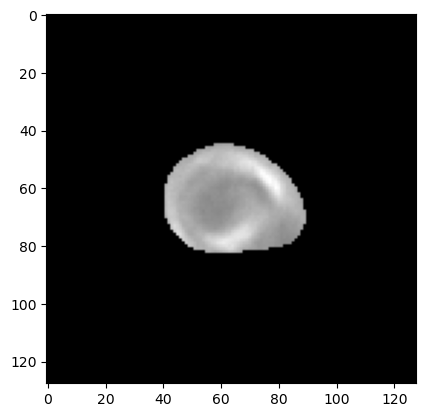

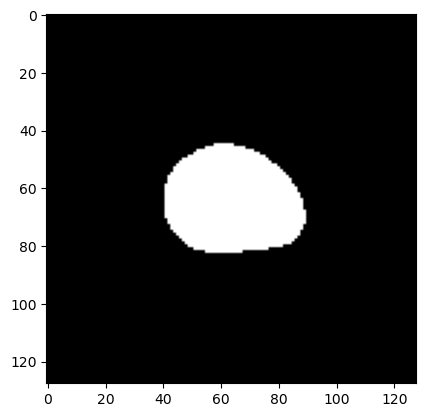

In [4]:
#make sure the list and cell images align correctly
#for 15%:

ameoba_image_15 = np.load(r"A:\3rd_Year_Project\Project_code\data\final_data\15_percent.npy")
BlueLight_image_15 = np.load(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\15_percent.npy")

a = 20

plt.imshow(ameoba_image_15[a, :, :], cmap='gray')
plt.show()
plt.imshow(BlueLight_image_15[a, :, :], cmap='gray')
plt.show()

In [5]:
#Great, the images and list line up therefore we can combine them

class ImageDataset(Dataset): #the class to add the images and labels to
    def __init__(self, images, labels):
        self.images = torch.tensor(images, dtype=torch.float32).unsqueeze(1)  # Add channel dim
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

ameoba_image_15 = np.load(r"A:\3rd_Year_Project\Project_code\data\final_data\15_percent.npy")
ameoba_image_2nd = np.load(r"A:\3rd_Year_Project\Project_code\data\final_data\2nd_light.npy")
list_15 = np.load(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\15_percent_labels.npy")
list_2nd = np.load(r"A:\3rd_Year_Project\Project_code\data\Mask x Blue\2nd_labels.npy")

dataset2nd = ImageDataset(ameoba_image_2nd, list_2nd)
dataset15 = ImageDataset(ameoba_image_15, list_15)

train_loader_2nd = DataLoader(dataset2nd, batch_size=64, shuffle=True)
train_loader_15 = DataLoader(dataset15, batch_size=64, shuffle=True)


#for batch in train_loader_2nd:
#    img, lbl = batch
#    print(img.shape, lbl.shape) #Should be (batch_size, 1, Height, Width) & (batch_size)

#for batch in train_loader_15:
#    img, lbl = batch
#    print(img.shape, lbl.shape)

In [6]:
#save the combined data
np.savez_compressed(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\15.npz", images = ameoba_image_15, labels = list_15)
np.savez_compressed(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\2nd.npz", images = ameoba_image_2nd, labels = list_2nd)

['images', 'labels']
['images', 'labels']
(12619,)
(8461,)
(12619, 128, 128)


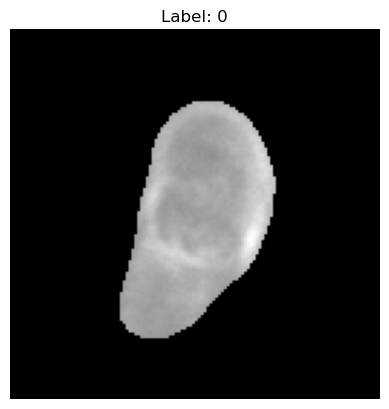

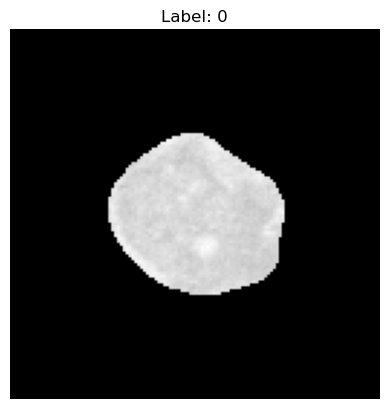

In [7]:
#check if the files are loaded correctly
# Load the data from the .npz files
fifteen = np.load(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\15.npz")
second = np.load(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\2nd.npz")

# Assuming the data is stored as 'image' and 'label' in the .npz files
# Check the structure of the data to know how it is saved
print(fifteen.files)
print(second.files)

# Example of extracting the image and label (adjust keys based on actual file structure)
image_fifteen = fifteen['images']  # Adjust this based on actual key name
label_fifteen = fifteen['labels']  # Adjust this based on actual key name
image_second = second['images']
label_second = second['labels']

a = 6
print(label_fifteen.shape)
print(label_second.shape)
print(image_fifteen.shape)

# Plot the image
plt.imshow(image_fifteen[a], cmap="gray")
plt.title(f"Label: {label_fifteen[a]}")  # Add the label as the title
plt.axis('off')  # Optional: to hide axis ticks and labels
plt.show()

plt.imshow(image_second[a], cmap="gray")
plt.title(f"Label: {label_second[a]}")
plt.axis('off')
plt.show()

In [9]:
#get the data ready for the siamese network in the form of img1, img2, label

# Load the data from the .npz files
fifteen = np.load(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\15.npz")
second = np.load(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\2nd.npz")

# Example of extracting the image and label (adjust keys based on actual file structure)
image_fifteen = fifteen['images']  # Adjust this based on actual key name
label_fifteen = fifteen['labels']  # Adjust this based on actual key name
image_second = second['images']
label_second = second['labels']

img1_images = [] #Healthy data for first channel in siamese
img2_images15 = [] #The test data either healthy or harmed
label1_images = [] #Label img1(always zero)
label2_images15 = [] # label for img2 data (either 0 or 1)
img2_images2 = [] #test data for 2nd light images
label2_images2 = [] #labels for img2_images2

for image, label in zip(image_fifteen, label_fifteen):
    #img2_images15.append(image) #Dont need, I loaded this data already in the previous cells I'm just stupid
    #label2_images15.append(label) #Dont need, I loaded this data already in the previous cells I'm just stupid

    if label_fifteen[label] == 0:
        img1_images.append(image)
        label1_images.append(label)


for image, label in zip(image_second, label_second):
    #img2_images2.append(image) #Dont need, I loaded this data already in the previous cells I'm just stupid
    #label2_images2.append(label) #Dont need, I loaded this data already in the previous cells I'm just stupid

    if label_fifteen[label] == 0:
        img1_images.append(image)
        label1_images.append(label)

np.save(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\img1.npy", img1_images)
np.savez_compressed(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\img1.npz", images = img1_images, labels = label1_images)
#np.savez_compressed(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\img2_15.npz", images = img2_images15, labels = label2_images15) #Dont need, I loaded this data already in the previous cells I'm just stupid
#np.savez_compressed(r"A:\3rd_Year_Project\Project_code\data\Siamese_dataset\img2_2nd.npz", images = img2_images2, labels = label2_images2) #Dont need, I loaded this data already in the previous cells I'm just stupid